In [1]:
# Importando Bibliotecas
import numpy as np 
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Setando para aparecer todas as colunas

pd.set_option('display.max_columns', None)

In [3]:
# Carregando os dados
df_item = pd.read_csv("olist_order_items_dataset.csv")
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_order_pay = pd.read_csv("olist_order_payments_dataset.csv")
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_category = pd.read_csv("product_category_name_translation.csv")

In [4]:
# Unindo os data sets

df_all_NaoTratado = df_orders.merge(df_item, on='order_id', how='left')
df_all_NaoTratado = df_all_NaoTratado.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_all_NaoTratado = df_all_NaoTratado.merge(df_reviews, on='order_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_products, on='product_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_customers, on='customer_id', how='outer')
df_all_NaoTratado = df_all_NaoTratado.merge(df_sellers, on='seller_id', how='outer')

print(df_all_NaoTratado.shape)

(119143, 39)


### Limpeza e compreensão dos dados.

In [5]:
# Uma primeira olhada nos dados.

print(df_all_NaoTratado.shape)
print(df_all_NaoTratado.head())
print(df_all_NaoTratado.columns)
print(df_all_NaoTratado.info())

(119143, 39)
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00     

In [6]:
df_all_NaoTratado.isnull().sum() / df_all_NaoTratado.shape[0] * 100 

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.148561
order_delivered_carrier_date      1.750837
order_delivered_customer_date     2.871339
order_estimated_delivery_date     0.000000
order_item_id                     0.699160
product_id                        0.699160
seller_id                         0.699160
shipping_limit_date               0.699160
price                             0.699160
freight_value                     0.699160
payment_sequential                0.002518
payment_type                      0.002518
payment_installments              0.002518
payment_value                     0.002518
review_id                         0.836810
review_score                      0.836810
review_comment_title             88.258647
review_comment_message           57.827988
review_creation_date              0.836810
review_answ

In [7]:
df_all_NaoTratado.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


In [8]:
df_all_NaoTratado.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1.0,boleto,1.0,44.09,1bafb430e498b939f258b9c9dbdff9b1,3.0,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350.0,

In [9]:
df_all_NaoTratado.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [10]:
df_all_NaoTratado.columns.value_counts().sum()

39

In [11]:
df_all_NaoTratado.drop('review_comment_message', axis=1, inplace=True)
df_all_NaoTratado.drop('review_comment_title', axis=1, inplace=True)
df_all_NaoTratado.drop('product_description_lenght', axis=1, inplace=True)
df_all_NaoTratado.drop('product_name_lenght', axis=1, inplace=True)
df_all_NaoTratado.drop('seller_zip_code_prefix', axis=1, inplace  =True)
df_all_NaoTratado.drop('customer_zip_code_prefix', axis=1, inplace  =True)
df_all_NaoTratado.drop('product_photos_qty', axis=1, inplace  =True)
df_all_NaoTratado.drop('review_answer_timestamp', axis=1, inplace  =True)


In [12]:
df_all_NaoTratado.columns.value_counts().sum()

31

In [13]:
df_all_NaoTratado.isnull().sum() / df_all_NaoTratado.shape[0] * 100 

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_carrier_date     1.750837
order_delivered_customer_date    2.871339
order_estimated_delivery_date    0.000000
order_item_id                    0.699160
product_id                       0.699160
seller_id                        0.699160
shipping_limit_date              0.699160
price                            0.699160
freight_value                    0.699160
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_id                        0.836810
review_score                     0.836810
review_creation_date             0.836810
product_category_name            2.133571
product_weight_g                 0.715946
product_length_cm                0

In [14]:
df_all_tratando = df_all_NaoTratado.dropna(subset=['product_category_name'])

In [15]:
df_all_NaoTratado.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_creation_date              997
product_category_name            2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
customer_uni

In [16]:
# Criando uma tabela para verificar o data set.

def resumo_tabela(df):
    print(f"Dataset Shape: {df.shape}")
    sumario = pd.DataFrame(df.dtypes,columns=['dtypes'])
    sumario = sumario.reset_index()
    sumario['Name'] = sumario['index']
    sumario = sumario[['Name','dtypes']]
    sumario['Missing'] = df.isnull().sum().values    
    sumario['Uniques'] = df.nunique().values
    sumario['First Value'] = df.loc[0].values
    sumario['Last Value'] = df.iloc[-1, :].values
    

    for name in sumario['Name'].value_counts().index:
        sumario.loc[sumario['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return sumario

In [17]:
DF_all_tratando_00 = df_all_tratando.dropna(subset=['payment_sequential', 'payment_installments', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' ])

In [18]:
DF_all_tratando_00['review_score'].value_counts()

review_score
5.0    65381
4.0    21956
1.0    14553
3.0     9721
2.0     4022
Name: count, dtype: int64

In [19]:
# Tratando a coluna review_score

DF_all_tratando_00['review_score'].describe()

count    115633.000000
mean          4.034220
std           1.385697
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [20]:
from statistics import mode

# Calcular a moda da coluna 'valor'
moda_valor = mode(DF_all_tratando_00['review_score'])

# Exibir a moda
print(moda_valor)


5.0


<Axes: >

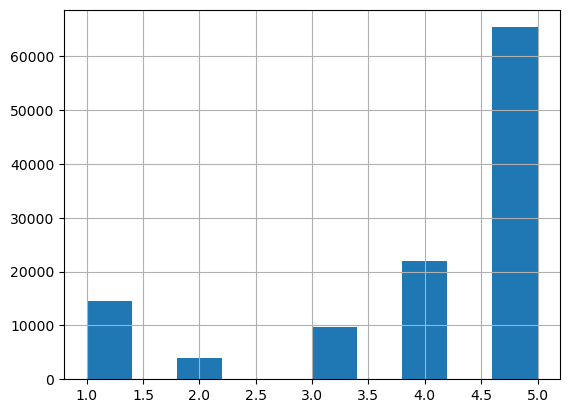

In [21]:
DF_all_tratando_00['review_score'].hist()

In [22]:
# Média arredondada.

DF_all_tratando_00['review_score'] = DF_all_tratando_00['review_score'].fillna(4.0)

C:\Users\User\AppData\Local\Temp\ipykernel_14888\1784086810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_all_tratando_00['review_score'] = DF_all_tratando_00['review_score'].fillna(4.0)


In [23]:
DF_all_tratando_00['review_score'].value_counts()

review_score
5.0    65381
4.0    22920
1.0    14553
3.0     9721
2.0     4022
Name: count, dtype: int64

In [24]:
DF_all_tratando_00.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_city', 'customer_state', 'seller_city',
       'seller_state'],
      dtype='object')

In [25]:
df_O_list = DF_all_tratando_00.rename(columns={
    'order_id': 'id_pedido',
    'customer_id': 'id_cliente',
    'order_status': 'status_pedido',
    'order_purchase_timestamp': 'timestamp_compra',
    'order_approved_at': 'timestamp_aprovacao',
    'order_delivered_carrier_date': 'data_entrega_transportadora',
    'order_delivered_customer_date': 'data_entrega_cliente',
    'order_estimated_delivery_date': 'data_entrega_estimada',
    'order_item_id': 'id_item_pedido',
    'product_id': 'id_produto',
    'seller_id': 'id_vendedor',
    'shipping_limit_date': 'data_limite_envio',
    'price': 'preco',
    'freight_value': 'valor_frete',
    'payment_sequential': 'sequencial_pagamento',
    'payment_type': 'tipo_pagamento',
    'payment_installments': 'qtde_parcelas',
    'payment_value': 'valor_pagamento',
    'review_id': 'id_review',
    'review_score': 'pontuacao_review',
    'review_creation_date': 'data_criacao_review',
    'product_category_name': 'categoria_produto',
    'product_weight_g': 'peso_produto_g',
    'product_length_cm': 'comprimento_produto_cm',
    'product_height_cm': 'altura_produto_cm',
    'product_width_cm': 'largura_produto_cm',
    'customer_unique_id': 'id_cliente_unico',
    'customer_city': 'cidade_cliente',
    'customer_state': 'estado_cliente',
    'seller_city': 'cidade_vendedor',
    'seller_state': 'estado_vendedor'
})

In [26]:
resumo_tabela(df_O_list)

Dataset Shape: (116597, 31)


,Name,dtypes,Missing,Uniques,First Value,Last Value,Entropy
0,id_pedido,object,0,97275,e481f51cbdc54678b7cc49136f2d6af7,1565f22aa9452ff278638e87cc895678,16.42
1,id_cliente,object,0,97275,9ef432eb6251297304e76186b10a928d,56772dfbcbe7df908a284ff0d53adf7d,16.42
2,status_pedido,object,0,7,delivered,delivered,0.19
3,timestamp_compra,object,0,96740,2017-10-02 10:56:33,2018-05-15 17:41:00,16.41
4,timestamp_aprovacao,object,14,88974,2017-10-02 11:07:15,2018-05-16 03:35:29,16.25
5,data_entrega_transportadora,object,1215,79811,2017-10-04 19:55:00,2018-05-16 17:20:00,16.01
6,data_entrega_cliente,object,2517,94354,2017-10-10 21:25:13,2018-05-21 14:31:41,16.38
7,data_entrega_estimada,object,0,449,2017-10-18 00:00:00,2018-05-29 00:00:00,8.47
8,id_item_pedido,float64,0,21,1.0,1.0,0.72
9,id_produto,object,0,32340,87285b34884572647811a353c7ac498a,9c1e194db1d35a79d962ea610bfe0868,13.60


In [27]:
df = pd.read_csv('my_data.csv')
df.head(10)

,id_pedido,id_cliente,status_pedido,timestamp_compra,timestamp_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete,sequencial_pagamento,tipo_pagamento,qtde_parcelas,valor_pagamento,id_review,pontuacao_review,data_criacao_review,categoria_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm,id_cliente_unico,cidade_cliente,estado_cliente,cidade_vendedor,estado_vendedor
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1.0,credit_card,3.0,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,2017-08-19 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1.0,credit_card,1.0,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,2017-08-08 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,1.0,boleto,1.0,44.09,1bafb430e498b939f258b9c9dbdff9b1,3.0,2017-11-08 00:00:00,utilidades_domesticas,500.0,19.0,8.0,13.0,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,maua,SP
6,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,1.0,credit_card,1.0,83.69,b8238c6515192f8129081e17dc57d169,5.0,2017-08-17 00:00:00,bebes,238.0,20.0,10.0,15.0,02c9e0c05a817d4562ec0e8c90f29dba,itaquaquecetuba,SP,maua,SP
7,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,2017-08-15 02:15:13,2017-08-16 15:52:29,2017-08-25 21:59:26,2017-08-28 00:00:00,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 02:15:13,75.90,7.79,1.0,credit_card,2.0,83.69,186b

# Iniciando a Análise.

### Quais são os produtos mais vendidos?

In [28]:
df.columns

Index(['id_pedido', 'id_cliente', 'status_pedido', 'timestamp_compra',
       'timestamp_aprovacao', 'data_entrega_transportadora',
       'data_entrega_cliente', 'data_entrega_estimada', 'id_item_pedido',
       'id_produto', 'id_vendedor', 'data_limite_envio', 'preco',
       'valor_frete', 'sequencial_pagamento', 'tipo_pagamento',
       'qtde_parcelas', 'valor_pagamento', 'id_review', 'pontuacao_review',
       'data_criacao_review', 'categoria_produto', 'peso_produto_g',
       'comprimento_produto_cm', 'altura_produto_cm', 'largura_produto_cm',
       'id_cliente_unico', 'cidade_cliente', 'estado_cliente',
       'cidade_vendedor', 'estado_vendedor'],
      dtype='object')

In [29]:


# Agrupando
df_produtos_vendidos = df.groupby(['id_produto', 'categoria_produto'])['id_pedido'].count().to_frame()

# Coluna vira linha
df_produtos_vendidos = df_produtos_vendidos.stack()

# nome aos bois
df_produtos_vendidos.name = 'Quantidade Vendida'

# Indice deu pau
df_produtos_vendidos = df_produtos_vendidos.reset_index()

df_produtos_vendidos.sort_values(by='Quantidade Vendida', ascending=False, inplace=True)

df_produtos_vendidos.head(5)

,id_produto,categoria_produto,level_2,Quantidade Vendida
21723,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,id_pedido,536
19393,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,id_pedido,528
8455,422879e10f46682990de24d770e7f83d,ferramentas_jardim,id_pedido,508
7230,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,id_pedido,406
6949,368c6c730842d78016ad823897a372db,ferramentas_jardim,id_pedido,398


In [30]:
df_produtosMaisVendidos_agregados = df_produtos_vendidos.groupby('categoria_produto')['Quantidade Vendida'].sum()
df_produtosMaisVendidos_agregados.sort_values(ascending=False, inplace=True)
df_produtosMaisVendidos_agregados.head()

categoria_produto
cama_mesa_banho           11988
beleza_saude              10029
esporte_lazer              9004
moveis_decoracao           8832
informatica_acessorios     8150
Name: Quantidade Vendida, dtype: int64

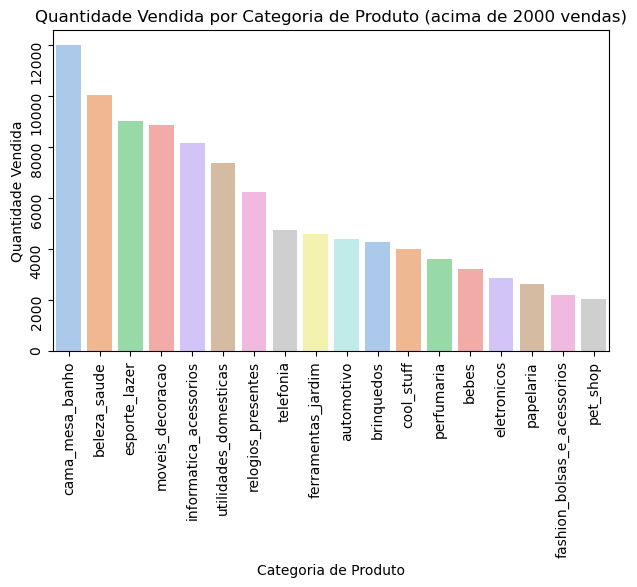

In [31]:

# Gerenciamento de Erros:
try:
    # Filtrar produtos com mais de 2000 vendas
    df_produtosMaisVendidos_filtrados_2000mais = df_produtosMaisVendidos_agregados[df_produtosMaisVendidos_agregados > 2000]

    # Criar gráfico de barras com Seaborn
    sns.barplot(x=df_produtosMaisVendidos_filtrados_2000mais.index,
                y=df_produtosMaisVendidos_filtrados_2000mais.values,
                palette='pastel')

    # Rotacionar rótulos do eixo X para melhor leitura (opcional)
    plt.xticks(rotation=90)

    # Ajustar espaçamento entre barras para nomes longos (opcional)
    plt.tight_layout()

    # Definir rótulos do eixo X (abordagem corrigida)
    plt.xlabel('Categoria de Produto')
    plt.tick_params(labelrotation=90)  # Rotacionar automaticamente

    # Customização do gráfico (opcional)
    plt.title('Quantidade Vendida por Categoria de Produto (acima de 2000 vendas)')
    plt.ylabel('Quantidade Vendida')
    plt.subplots_adjust(bottom=0.3)  # Ajustar espaço para nomes longos

    plt.show()

except ModuleNotFoundError as e:
    print("Erro: Biblioteca Seaborn não encontrada. Instale usando 'pip install seaborn'.")
except Exception as e:  # Capturar outros erros
    print(f"Erro: {e}")


In [32]:
# Modelando as categorias.

categorias_vendas = dict(df_produtosMaisVendidos_agregados.items())
print(categorias_vendas)

{'cama_mesa_banho': 11988, 'beleza_saude': 10029, 'esporte_lazer': 9004, 'moveis_decoracao': 8832, 'informatica_acessorios': 8150, 'utilidades_domesticas': 7380, 'relogios_presentes': 6213, 'telefonia': 4726, 'ferramentas_jardim': 4590, 'automotivo': 4400, 'brinquedos': 4281, 'cool_stuff': 3999, 'perfumaria': 3589, 'bebes': 3203, 'eletronicos': 2846, 'papelaria': 2625, 'fashion_bolsas_e_acessorios': 2170, 'pet_shop': 2030, 'moveis_escritorio': 1788, 'consoles_games': 1192, 'malas_acessorios': 1163, 'construcao_ferramentas_construcao': 955, 'eletrodomesticos': 826, 'instrumentos_musicais': 719, 'eletroportateis': 705, 'casa_construcao': 635, 'livros_interesse_geral': 565, 'moveis_sala': 532, 'alimentos': 526, 'casa_conforto': 478, 'bebidas': 390, 'audio': 381, 'market_place': 332, 'construcao_ferramentas_iluminacao': 314, 'climatizacao': 302, 'moveis_cozinha_area_de_servico_jantar_e_jardim': 299, 'alimentos_bebidas': 291, 'fashion_calcados': 278, 'industria_comercio_e_negocios': 272, 'l

In [33]:
categorias_maiores = {
    "Casa e Decoração": ["cama_mesa_banho", "moveis_decoracao", "utilidades_domesticas", "eletrodomesticos", "casa_construcao", "moveis_sala", "casa_conforto", "moveis_cozinha_area_de_servico_jantar_e_jardim", "moveis_quarto", "moveis_colchao_e_estofado"],
    "Beleza e Saúde": ["beleza_saude", "perfumaria", "bebes", "higiene"],
    "Tecnologia": ["informatica_acessorios", "eletronicos", "telefonia", "eletroportateis", "tablets_impressao_imagem", "portateis_casa_forno_e_cafe", "cine_foto", "dvds_blu_ray", "pc_gamer", "pcs"],
    "Lazer": ["esporte_lazer", "brinquedos", "cool_stuff", "relogios_presentes", "consoles_games", "livros_interesse_geral", "musica", "cds_dvds_musicais", "jogos", "artigos_de_festas"],
    "Moda": ["fashion_bolsas_e_acessorios", "fashion_calcados", "fashion_underwear_e_moda_praia", "fashion_roupa_feminina", "fashion_roupa_masculina", "fashion_roupa_infanto_juvenil", "fashion_esporte"],
    "Outros": ["ferramentas_jardim", "automotivo", "pet_shop", "escritorio", "papelaria", "alimentos", "bebidas", "audio", "market_place", "climatizacao", "agro_industria_e_comercio", "artes_e_artesanato", "la_cuisine", "portateis_cozinha_e_preparadores_de_alimentos", "fraldas_higiene", "flores", "seguros_e_servicos", "sinalizacao_e_seguranca", "artigos_de_natal"],
}
from collections import defaultdict

vendas_por_categoria_maior = defaultdict(int)

for categoria_menor, vendas_plot in categorias_vendas.items():
    for categoria_maior, subcategorias in categorias_maiores.items():
        if categoria_menor in subcategorias:
            vendas_por_categoria_maior[categoria_maior] += vendas_plot


for categoria_maior, vendas_plot in vendas_por_categoria_maior.items():
    print(f"{categoria_maior}: {vendas_plot}")


Casa e Decoração: 31137
Beleza e Saúde: 16821
Lazer: 25354
Tecnologia: 16967
Outros: 16313
Moda: 2826


In [34]:
df_vendas_por_categoria_maior = pd.DataFrame({
    "Categoria_Produto": vendas_por_categoria_maior.keys(),
    "Quantidade_Vendida": vendas_por_categoria_maior.values()
})
df_vendas_por_categoria_maior.head(5)

,Categoria_Produto,Quantidade_Vendida
0,Casa e Decoração,31137
1,Beleza e Saúde,16821
2,Lazer,25354
3,Tecnologia,16967
4,Outros,16313


In [35]:
df_vendas_por_categoria_maior_ordenado = df_vendas_por_categoria_maior.sort_values(by = 'Quantidade_Vendida', ascending= False )
df_vendas_por_categoria_maior_ordenado.head()

,Categoria_Produto,Quantidade_Vendida
0,Casa e Decoração,31137
2,Lazer,25354
3,Tecnologia,16967
1,Beleza e Saúde,16821
4,Outros,16313


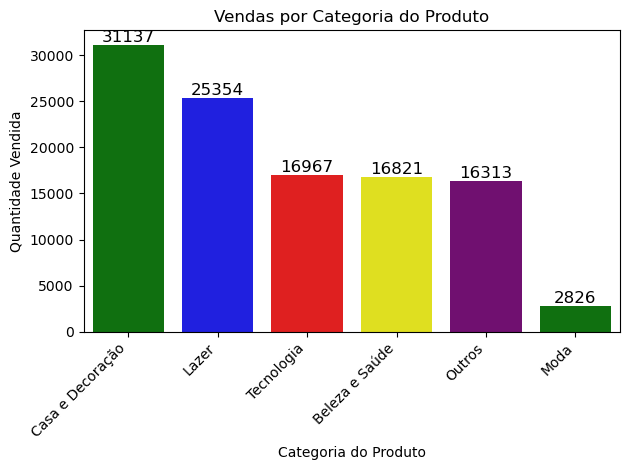

In [36]:
categorias_plot2 = df_vendas_por_categoria_maior_ordenado['Categoria_Produto'].tolist()
vendas_plot2 = df_vendas_por_categoria_maior_ordenado['Quantidade_Vendida'].tolist()
cores = ['#008000', '#0000FF', '#FF0000', '#FFFF00', '#800080']


sns.barplot(x=categorias_plot2, y=vendas_plot2, palette=cores, hue=None)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Vendas por Categoria do Produto')


# valor total em cima de cada barra
for i in range(len(vendas_plot2)):
    plt.annotate(f"{vendas_plot2[i]}", (i, vendas_plot2[i]), ha='center', va='bottom', fontsize=12)

#removendo o caractere invisível
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

plt.show()


Portanto podemos concluir que os produtos mais vendidos são os de Casa e Decoração e os de Lazer.

Poderiamos levantar a hipótese de que no periodo de que temos informação, de 2016 a 2018, haviam outros e-commerce's que atuavam e tinham maior parcela dos mercados de moda e tecnologia, tais quais a Shein e a AliExpress

### Como se distribui as atividades da Olist pelo Brasil e qual seria a melhor localidade?

In [37]:
# Vendas por localidade

df_faturamento_por_cidade = df.groupby('cidade_cliente')['valor_pagamento'].sum()
df_faturamento_por_cidade.head()

cidade_cliente
abadia dos dourados     413.50
abadiania              1025.52
abaete                 1896.54
abaetetuba             6237.78
abaiara                 332.15
Name: valor_pagamento, dtype: float64

In [38]:
df_faturamento_por_cidade_ord = df_faturamento_por_cidade.sort_values(ascending=False)
df_faturamento_por_cidade_ord.head(10)

cidade_cliente
sao paulo         2825910.30
rio de janeiro    1558071.40
belo horizonte     498130.74
brasilia           430642.95
curitiba           328703.60
porto alegre       312210.01
salvador           285283.98
campinas           264894.82
goiania            210375.37
guarulhos          204028.86
Name: valor_pagamento, dtype: float64

Podemos rapidamente observar que São Paulo, Rio de Janeiro, Belo Horizonte e Curitiba
encabeçam a lista de cidades com maior faturamento.

Vamos verificar agora por Estado da federação.

In [39]:
df_faturamento_por_Estado = df.groupby('estado_cliente')['valor_pagamento'].sum()
df_faturamento_por_Estado.head()

estado_cliente
AC     24857.52
AL    110896.67
AM     33559.12
AP     21642.70
BA    788348.82
Name: valor_pagamento, dtype: float64

In [40]:
df_faturamento_por_Estado_ord= df_faturamento_por_Estado.sort_values(ascending=False)
df_faturamento_por_Estado_ord.head(27)


estado_cliente
SP    7554985.51
RJ    2748296.13
MG    2311970.57
RS    1134680.71
PR    1058906.29
BA     788348.82
SC     779608.48
GO     507733.14
DF     432733.16
ES     405492.65
PE     371914.07
CE     338806.08
MT     255908.18
PA     252218.95
MA     196953.12
PB     177781.66
MS     165370.08
PI     136021.99
RN     115621.14
AL     110896.67
SE      88214.47
TO      71505.56
RO      64967.06
AM      33559.12
AC      24857.52
AP      21642.70
RR      12160.39
Name: valor_pagamento, dtype: float64

A mesma conclusão de cidade se repete quanto ao Estado Federativo. Para podermos verificar a distribuição do faturamento e verificar os melhore locais de atuação veremos como se distribui por macro região.

In [41]:
df['estado_cliente'].unique()

array(['SP', 'SC', 'PR', 'RJ', 'MG', 'RS', 'CE', 'AM', 'BA', 'GO', 'PE',
       'MT', 'DF', 'MS', 'RN', 'ES', 'PB', 'AL', 'PI', 'SE', 'MA', 'PA',
       'AP', 'RO', 'RR', 'TO', 'AC'], dtype=object)

In [42]:
print(len(df['estado_cliente'].unique()))

27


In [43]:
# Mapeando cada estado para sua macro-região
macro_regioes = {
    "SP": "Sudeste",
    "RJ": "Sudeste",
    "MG": "Sudeste",
    "ES": "Sudeste",
    "PR": "Sul",
    "SC": "Sul",
    "RS": "Sul",
    "GO": "Centro-Oeste",
    "DF": "Centro-Oeste",
    "MT": "Centro-Oeste",
    "MS": "Centro-Oeste",
    "BA": "Nordeste",
    "PE": "Nordeste",
    "PB": "Nordeste",
    "AL": "Nordeste",
    "SE": "Nordeste",
    "RN": "Nordeste",
    "CE": "Nordeste",
    "PI": "Nordeste",
    "MA": "Nordeste",
    "PA": "Norte",
    "AM": "Norte",
    "AP": "Norte",
    "RO": "Norte",
    "RR": "Norte",
    "TO": "Norte",
    "AC": "Norte"
}

df['macro_regiao'] = df['estado_cliente'].apply(lambda estado: macro_regioes[estado])

df_faturamento_por_macro_regiao = df.groupby('macro_regiao')['valor_pagamento'].sum()
df_faturamento_por_macro_regiao_ord = df_faturamento_por_macro_regiao.sort_values(ascending=False)

# Imprime os resultados
print(df_faturamento_por_macro_regiao_ord)


macro_regiao
Sudeste         13020744.86
Sul              2973195.48
Nordeste         2324558.02
Centro-Oeste     1361744.56
Norte             480911.30
Name: valor_pagamento, dtype: float64


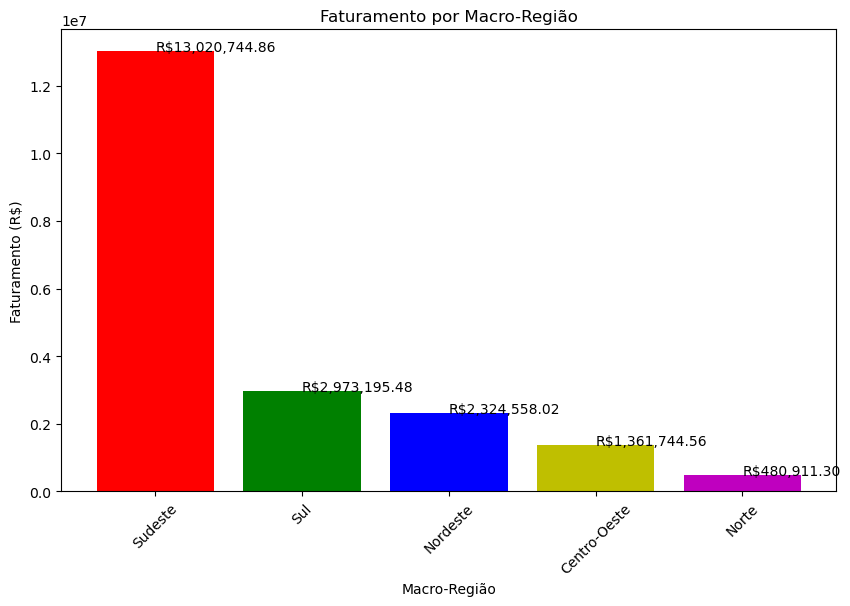

In [44]:


# Define o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Cria um dicionário com as cores para cada macro-região
cores = {
    "Sudeste": "r",
    "Sul": "g",
    "Nordeste": "b",
    "Centro-Oeste": "y",
    "Norte": "m"
}

# Cria o gráfico de barras
plt.bar(df_faturamento_por_macro_regiao_ord.index, df_faturamento_por_macro_regiao_ord, color=[cores[macro_regiao] for macro_regiao in df_faturamento_por_macro_regiao_ord.index])

# Adiciona título ao gráfico
plt.title('Faturamento por Macro-Região')

# Adiciona rótulos aos eixos
plt.xlabel('Macro-Região')
plt.ylabel('Faturamento (R$)')

# Rotaciona os rótulos do eixo x
plt.xticks(rotation=45)

# Para cada barra, coloca o valor acima dela
for i in range(len(df_faturamento_por_macro_regiao_ord)):
    plt.text(i, df_faturamento_por_macro_regiao_ord[i], f'R${df_faturamento_por_macro_regiao_ord[i]:,.2f}')

# Exibe o gráfico
plt.show()


Podemos concluir que as vendas na Macro-Região do Sudeste superam em muito as vendas em outras localidades, e portanto seria o lugar ideal para se estar caso queira vender pela Olist.

### Valor do Ticket.
Vamos explorar o valor por ticket e o ticket médio por periodo, alem de verificar tambem o ticket por localidade, afim de corroborar para as conclusões tiradas sobre local ideal para se vender.

In [45]:
# Ticket Medio.

#ticket_medio = df['valor_pagamento'].sum() / df.shape[0]
ticket_medio = df['valor_pagamento'].mean()
print(f'O valor do Ticket Médio na Olist é de: R${round(ticket_medio,2)}')

O valor do Ticket Médio na Olist é de: R$172.91


In [46]:
# Verificando a moda.

from statistics import multimode

# Calcula a moda do valor de pagamento
moda_valor_pagamento = multimode(df['valor_pagamento'])

# Imprime a moda
print(f"Moda do valor de pagamento: {moda_valor_pagamento}")


Moda do valor de pagamento: [50.0]


In [47]:
df['valor_pagamento'].describe()

count    116597.000000
mean        172.913147
std         267.595989
min           0.000000
25%          61.000000
50%         108.190000
75%         189.720000
max       13664.080000
Name: valor_pagamento, dtype: float64

In [48]:
# Média
media_valor_pagamento = df['valor_pagamento'].mean()

# Moda
moda_valor_pagamento, _ = stats.mode(df['valor_pagamento'])


d:\T.I\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


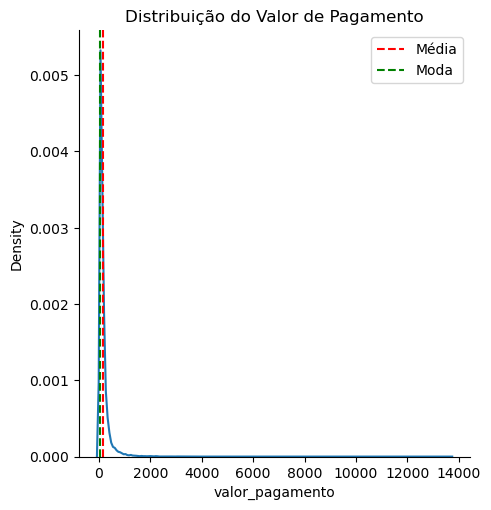

In [49]:
# Distribuição
sns.displot(df['valor_pagamento'], kind="kde")

# Adicionar linha da média
plt.axvline(media_valor_pagamento, color='r', linestyle='dashed', label='Média')

# Adicionar linha da moda
plt.axvline(moda_valor_pagamento, color='g', linestyle='dashed', label='Moda')

# Legendas
plt.legend()

# Título
plt.title('Distribuição do Valor de Pagamento')

# Mostrar o gráfico
plt.show()


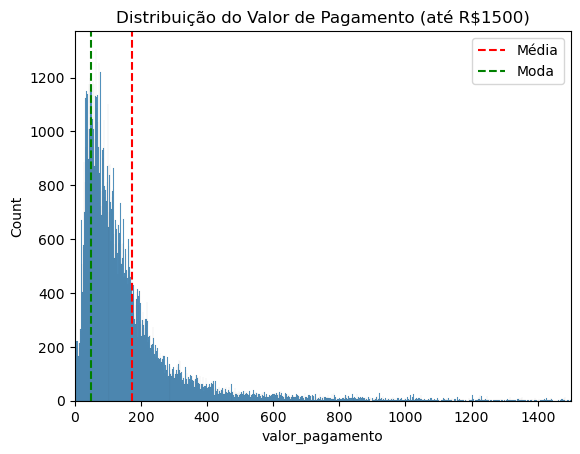

In [50]:

df_filtrado = df.loc[df['valor_pagamento'] <= 1500]

# média e a moda
media_valor_pagamento = df['valor_pagamento'].mean()
moda_valor_pagamento, _ = stats.mode(df['valor_pagamento'])

sns.histplot(df_filtrado['valor_pagamento'], bins=1000)
plt.xlim(0, 1500)

# linha da media e da moda
plt.axvline(media_valor_pagamento, color='r', linestyle='dashed', label='Média')
plt.axvline(moda_valor_pagamento, color='g', linestyle='dashed', label='Moda')


plt.legend()

# Título
plt.title('Distribuição do Valor de Pagamento (até R$1500)')

# Mostra o gráfico
plt.show()



In [51]:
print(f'O valor médio de pagamento é: R${round(media_valor_pagamento,2)}\nO Valor de pagamento que mais aparece, a moda é de: R${moda_valor_pagamento}')

O valor médio de pagamento é: R$172.91
O Valor de pagamento que mais aparece, a moda é de: R$50.0


Podemos concluir que sobre o valor dos pagamentos, embora a média dos valores pagos seja de R$172,91 o valor que mais vezes foi pago, a moda é de R$50,00 e portanto 
para vendas na Olist, produtos com o valor em torno de R$50,00 é um caminho mais indicado.

### Ticket por pediodo.

Vamos agora analisar a relação do valor do ticket por periodo para identificar os melhores momentos e períodos para podermos, no caso de um entrante no mercado pela Olist direcionar sua propaganda.

In [52]:
# Primeiro, para trabalharmos com a data da compra, vamos separar a coluna que está
# em timestamp entre data e hora.

# Tem que tirar de timestamp pra datetime
df['timestamp_compra'] = pd.to_datetime(df['timestamp_compra'])

# Criando as colunas.
df['data_compra'] = df['timestamp_compra'].dt.date
df['hora_compra'] = df['timestamp_compra'].dt.time
df['dia'] = df['timestamp_compra'].dt.day



In [53]:
# Vamos ver o valor 
df.groupby('data_compra').agg({'valor_pagamento': 'sum'})


,valor_pagamento
data_compra,
2016-09-04,272.46
2016-09-05,75.06
2016-10-02,109.34
2016-10-03,595.14
2016-10-04,13390.64
...,...
2018-08-26,10428.77
2018-08-27,6683.32
2018-08-28,5012.70


In [54]:
df.groupby('hora_compra').agg({'valor_pagamento': 'sum'})

,valor_pagamento
hora_compra,
00:00:00,41.06
00:00:01,330.10
00:00:02,61.60
00:00:06,658.77
00:00:07,265.31
...,...
23:59:53,48.01
23:59:54,340.80
23:59:55,78.80


In [55]:
df['data_compra']

0         2017-10-02
1         2017-10-02
2         2017-10-02
3         2017-08-15
4         2017-08-02
             ...    
116592    2018-07-01
116593    2017-03-11
116594    2018-07-24
116595    2018-05-22
116596    2018-05-15
Name: data_compra, Length: 116597, dtype: object

In [56]:
df_agrupado_dia = df.groupby('data_compra')

# Calcula a média do valor_pagamento
media_faturamento_dia = df_agrupado_dia['valor_pagamento'].mean()

# Exibe a média
print(media_faturamento_dia)



data_compra
2016-09-04    136.230000
2016-09-05     75.060000
2016-10-02    109.340000
2016-10-03     74.392500
2016-10-04    178.541867
                 ...    
2018-08-26    124.152024
2018-08-27     92.823889
2018-08-28    106.653191
2018-08-29    266.416250
2018-09-03    166.460000
Name: valor_pagamento, Length: 615, dtype: float64


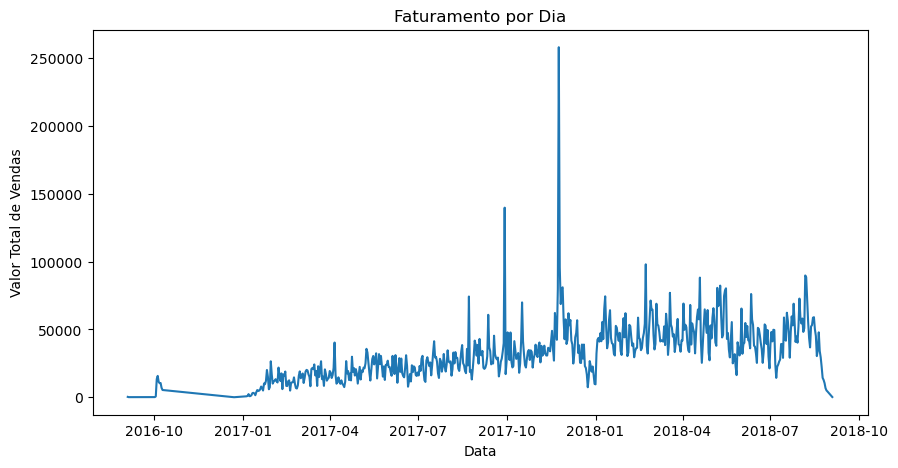

In [57]:

df_agrupado_dia = df.groupby('data_compra')['valor_pagamento'].sum()


plt.figure(figsize=(10, 5))
plt.plot(df_agrupado_dia.index, df_agrupado_dia.values)

plt.title('Faturamento por Dia')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas')

plt.show()

In [58]:
df['semana'] = df['timestamp_compra'].dt.isocalendar().week

# Mês
df['mes'] = df['timestamp_compra'].dt.month

# Trimestre
df['trimestre'] = (df['mes'] - 1) // 3 + 1

# Semestre
df['semestre'] = (df['mes'] - 1) // 6 + 1

# Ano
df['ano'] = df['timestamp_compra'].dt.year

In [59]:
# Dicionário para armazenar as médias
medias_faturamento = {}

# Agrupando por período e calculando a média do valor_pagamento
for periodo in ['dia', 'semana', 'mes', 'trimestre', 'semestre', 'ano']:
  medias_faturamento[periodo] = df.groupby(periodo)['valor_pagamento'].mean()


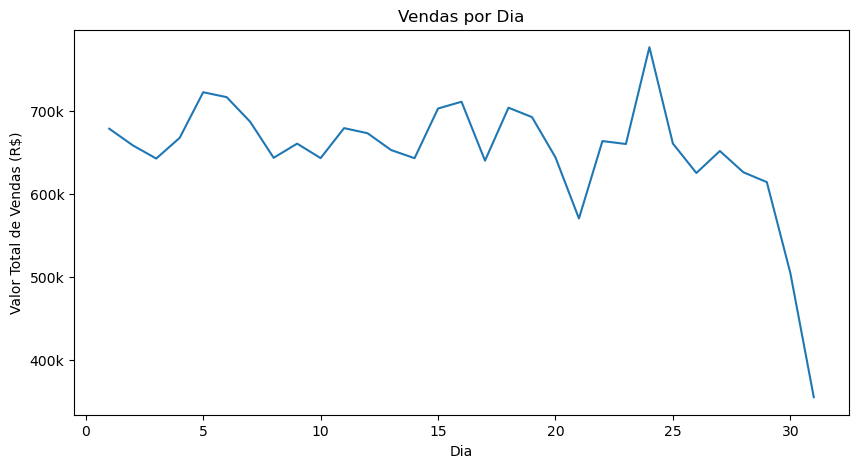

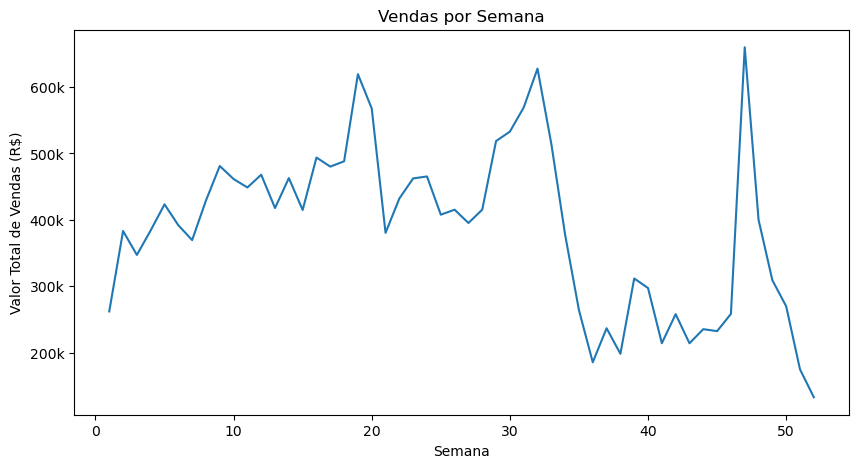

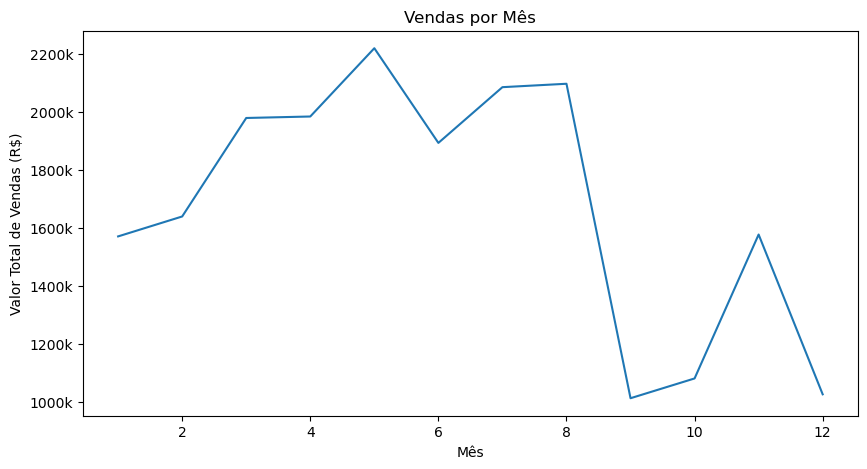

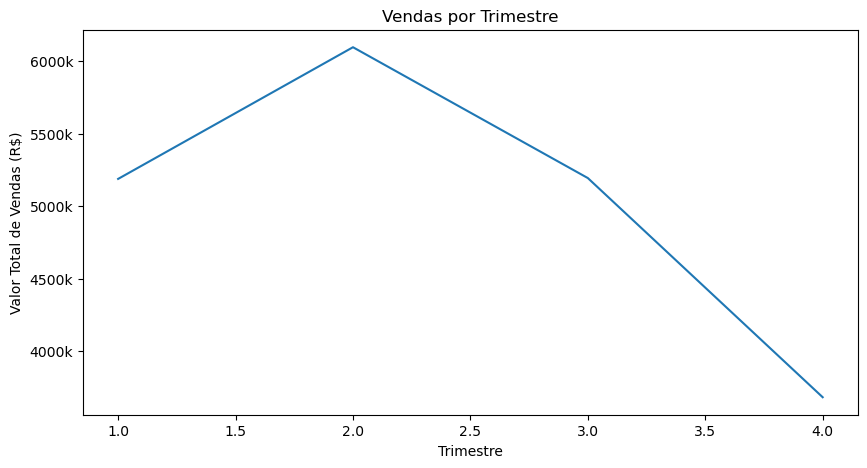

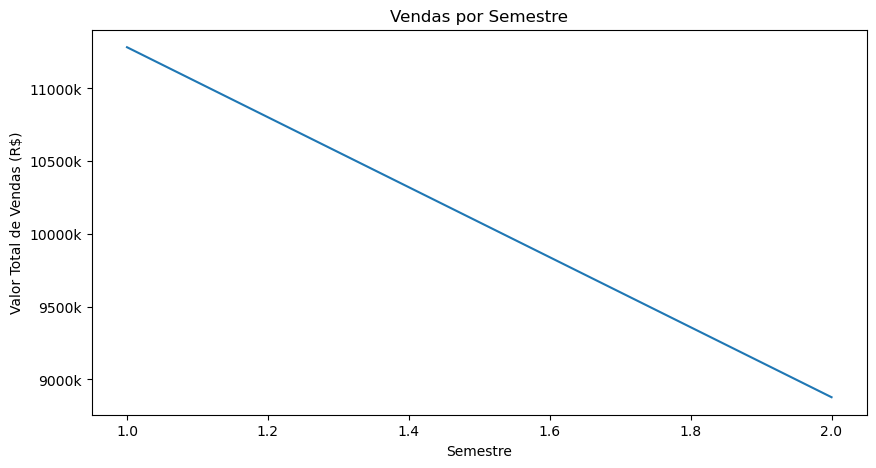

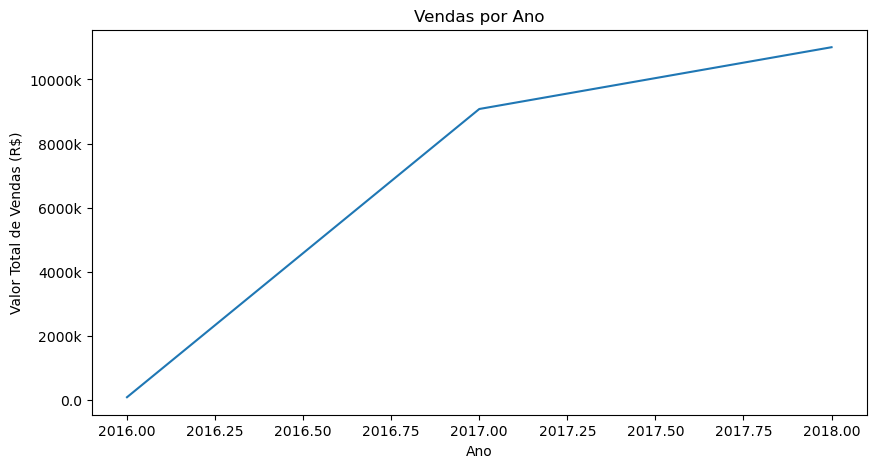

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Dicionário para labels dos eixos x
labels_eixo_x = {
  'dia': 'Dia',
  'semana': 'Semana',
  'mes': 'Mês',
  'trimestre': 'Trimestre',
  'semestre': 'Semestre',
  'ano': 'Ano'
}

# Função para plotar gráfico de vendas por período
def plotar_grafico_vendas(df, periodo, titulo):
  """
  Plota um gráfico de linhas para as vendas por período.

  Args:
    df: DataFrame pandas com as colunas 'data_compra' e 'valor_pagamento'.
    periodo: String que indica a granularidade da análise (dia, semana, mês etc.).
    titulo: String que define o título do gráfico.
  """
  # Agrupa os dados por período e calcula a soma do valor_pagamento
  df_agrupado = df.groupby(periodo)['valor_pagamento'].sum()

  # Define o tamanho da figura
  plt.figure(figsize=(10, 5))

  # Cria o gráfico de linhas
  plt.plot(df_agrupado.index, df_agrupado.values)

  # Define o título e os rótulos dos eixos
  plt.title(titulo)
  plt.xlabel(labels_eixo_x[periodo])
  plt.ylabel('Valor Total de Vendas (R$)')

  # Mostra o gráfico
  plt.show()

# Função para formatar valores com milhares
def formatar_milhares(x, pos):
  """
  Formata os valores do eixo Y com milhares.
  """
  if x >= 1000:
    return f'{int(x / 1000)}k'
  else:
    return f'{x}'

# Formatador de milhares para o eixo Y
from matplotlib.ticker import FuncFormatter
formatter_milhares = FuncFormatter(formatar_milhares)

# Plota os gráficos para cada período
periodos = ['dia', 'semana', 'mes', 'trimestre', 'semestre', 'ano']
for periodo in periodos:
  titulo = f'Vendas por {labels_eixo_x[periodo]}'
  
  # Agrupa os dados por período e calcula a soma do valor_pagamento
  df_agrupado = df.groupby(periodo)['valor_pagamento'].sum()
  
  # Define o tamanho da figura
  plt.figure(figsize=(10, 5))
  
  # Cria o gráfico de linhas
  plt.plot(df_agrupado.index, df_agrupado.values)
  
  # Define o título e os rótulos dos eixos
  plt.title(titulo)
  plt.xlabel(labels_eixo_x[periodo])
  plt.ylabel('Valor Total de Vendas (R$)')
  
  # Define o formatador de milhares para o eixo Y
  plt.gca().yaxis.set_major_formatter(formatter_milhares)
  
  # Mostra o gráfico
  plt.show()

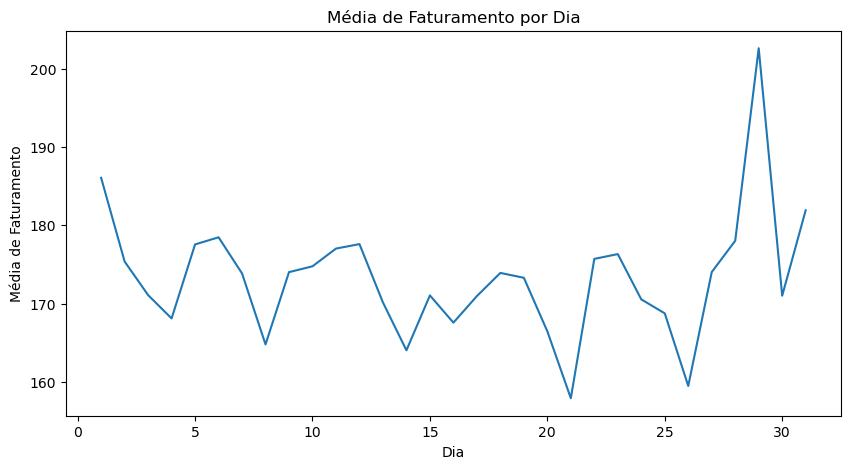

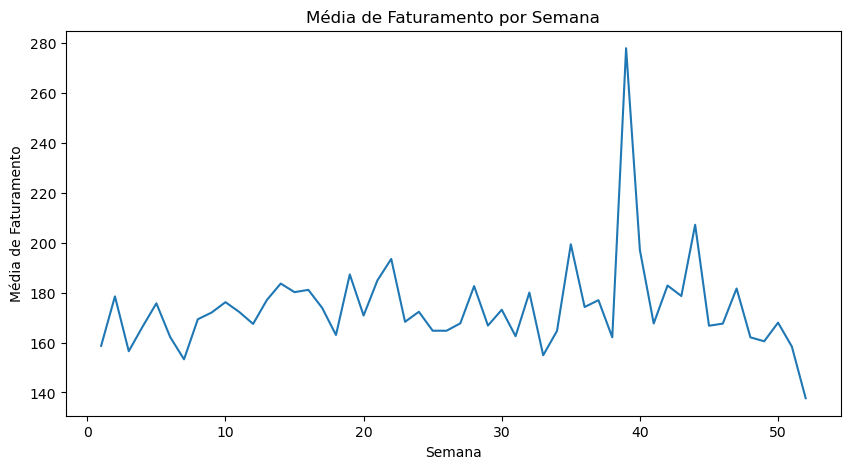

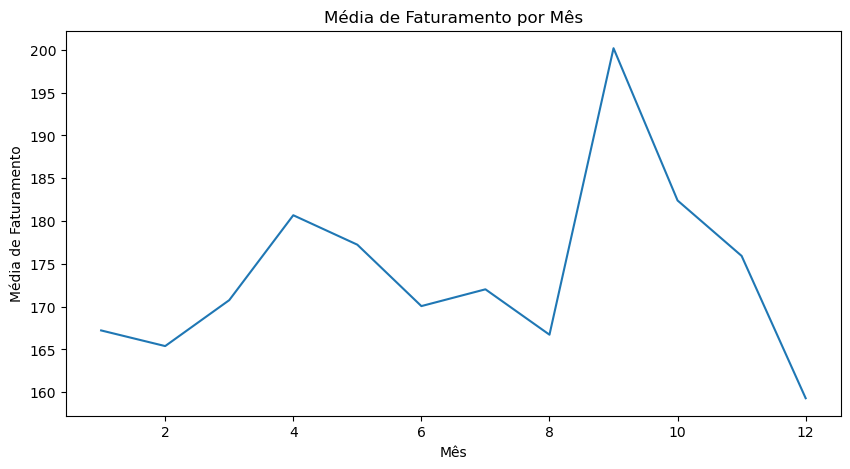

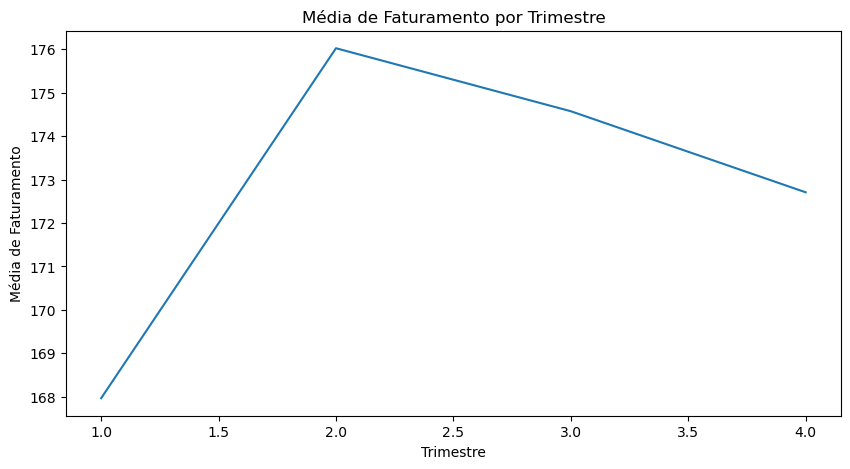

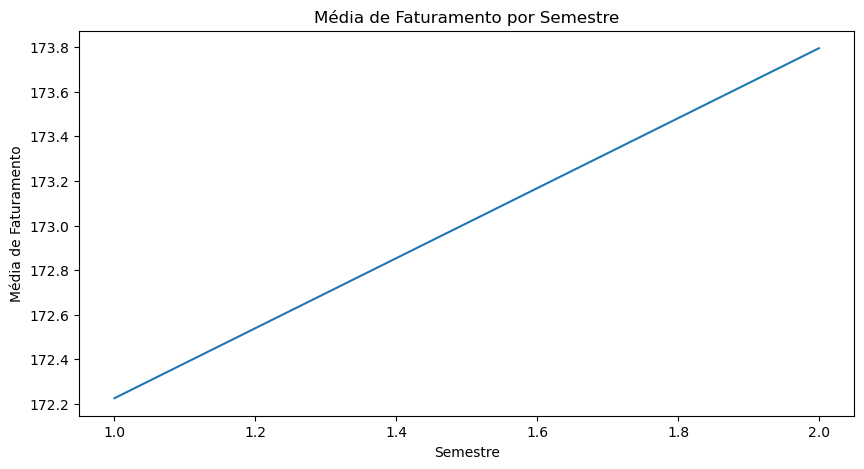

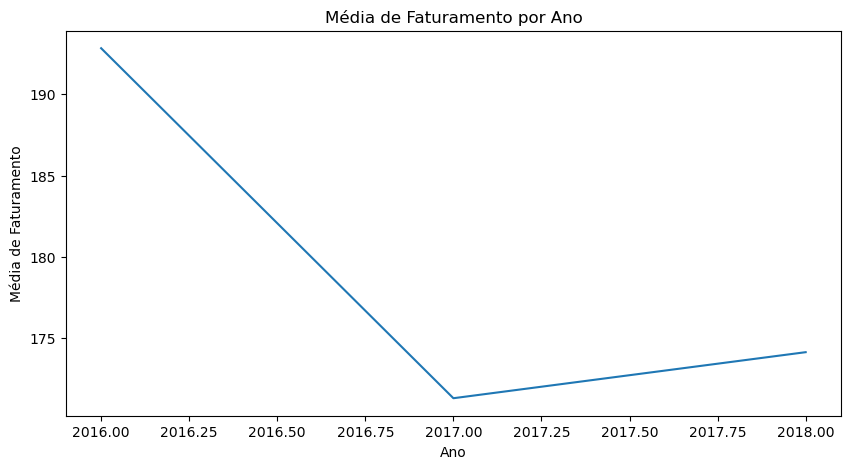

In [61]:
# Dicionário para labels dos eixos x
labels_eixo_x = {
  'dia': 'Dia',
  'semana': 'Semana',
  'mes': 'Mês',
  'trimestre': 'Trimestre',
  'semestre': 'Semestre',
  'ano': 'Ano'
}

# Plotando os gráficos
for periodo, media_faturamento in medias_faturamento.items():
  titulo = f'Média de Faturamento por {labels_eixo_x[periodo]}'
  
  # Define o tamanho da figura
  plt.figure(figsize=(10, 5))
  
  # Cria o gráfico de linhas
  plt.plot(media_faturamento.index, media_faturamento.values)
  
  # Define o título e os rótulos dos eixos
  plt.title(titulo)
  plt.xlabel(labels_eixo_x[periodo])
  plt.ylabel('Média de Faturamento')
  
  # Mostra o gráfico
  plt.show()


Acima temos uma ideia da evolução do faturamento por periodos de tamanhos diferentes, tanto o faturamento total, quanto a média destes. Foi possivel notar que a o maior pico de compras se deu na Black Friday de 2017, porem é possivel notar uma queda nas vendas conforme o passar do tempo. Porem para ter certeza é necessário fazer uma analise mais profunda.

In [92]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [72]:
# Para melhor observarmos o faturamento ao longo do tempo, vamos fazer uma analise com série temporal.

df.groupby('data_compra').agg({'valor_pagamento': 'sum'})

,valor_pagamento
data_compra,
2016-09-04,272.46
2016-09-05,75.06
2016-10-02,109.34
2016-10-03,595.14
2016-10-04,13390.64
...,...
2018-08-26,10428.77
2018-08-27,6683.32
2018-08-28,5012.70


In [78]:
df_series_temporal = df.groupby('data_compra').agg({'valor_pagamento': 'sum'})


In [80]:
df_series_temporal.index.name

'data_compra'

In [82]:
df_series_temporal = df_series_temporal.reset_index()

In [83]:
df_series_temporal.columns

Index(['data_compra', 'valor_pagamento'], dtype='object')

In [84]:
df_series_temporal.head()

,data_compra,valor_pagamento
0,2016-09-04,272.46
1,2016-09-05,75.06
2,2016-10-02,109.34
3,2016-10-03,595.14
4,2016-10-04,13390.64


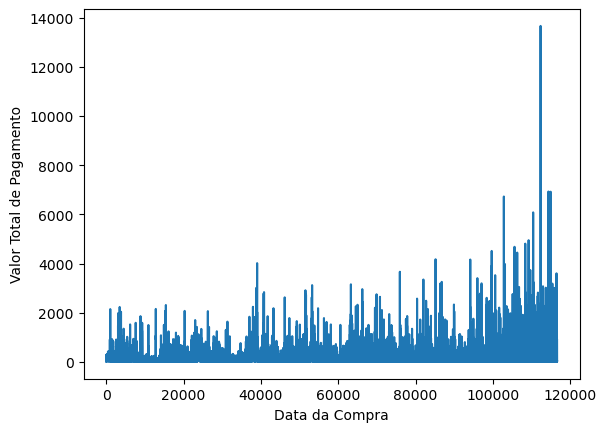

In [85]:
plt.plot(df['valor_pagamento'])
plt.xlabel('Data da Compra')
plt.ylabel('Valor Total de Pagamento')
plt.show()


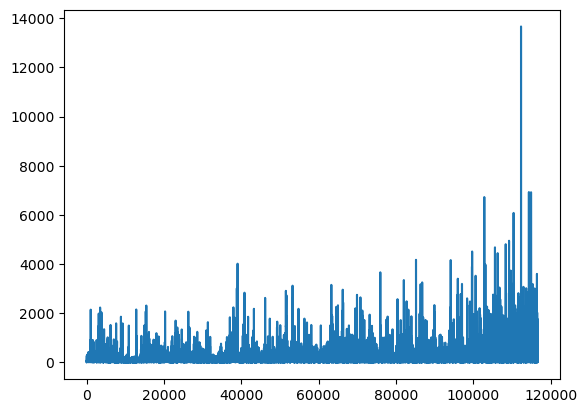

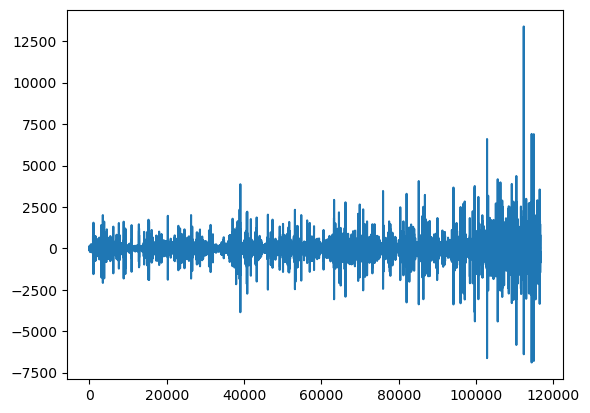

In [86]:
# Visualizando a série temporal
plt.plot(df['valor_pagamento'])
plt.show()

# Verificando a amplitude da sazonalidade
df['valor_pagamento'].diff().plot()
plt.show()


In [95]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

ADF Statistic: -31.914063258019294
p-value: 0.0
Valores Críticos
	1%: -3.430
	5%: -2.862
	10%: -2.567
É estacionário!


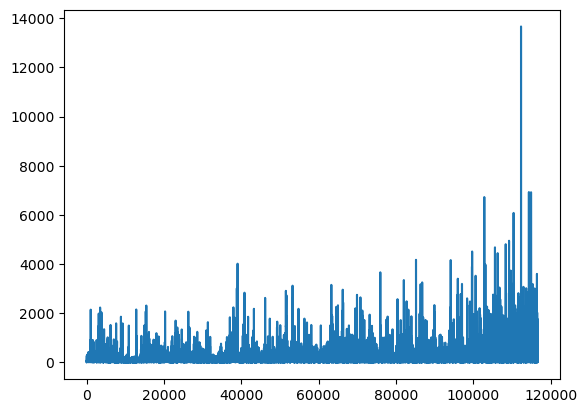

In [97]:
name = 'valor_pagamento'

result = adfuller(df[name])

df[name].plot()

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Valores Críticos')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] < 0.05:
    print('É estacionário!')
else:
    print('Não é Estacionário!')


Agora que sabemos que a série é estácionária, podemos decompor a série para descobrir a tendencia, se o valor_pagamento está aumentando ou diminuindo.

C:\Users\User\AppData\Local\Temp\ipykernel_14888\916047713.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


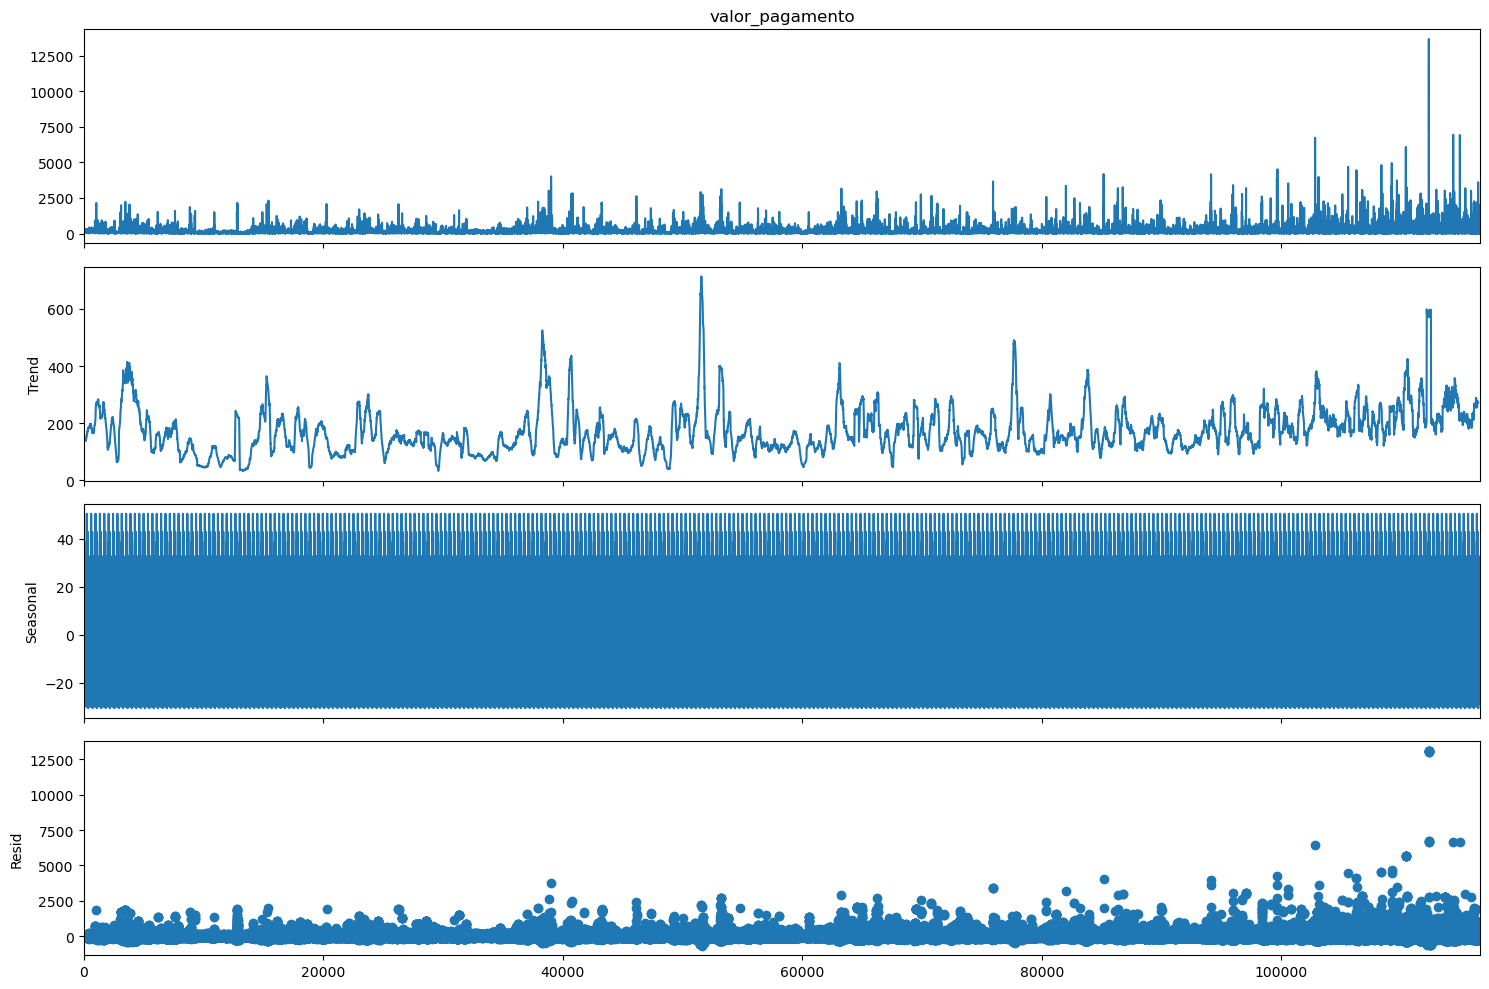

In [101]:

decomposed = seasonal_decompose(
    df['valor_pagamento'], model='additive', period=365)
fig = decomposed.plot()
fig.set_size_inches((15, 10))
fig.tight_layout()
plt.show()

# Conclusão.

Podemos concluir que a série é estacionária, sem uma tendencia de crescimento do valor de pagamento. Ja sobre a sazonalidade, podemos inferir que há um pico no veral, nos meses de dezembro e fevereiro, e uma queda nos meses de inverno. Sobre a Ciclicidade e o Resíduo, não foi possivel observar um padrão claro. 



Portanto para uma pessoa que quer iniciar a venda online de produtos a Olist, é sim uma boa opção porem com algumas restrições. Sozinha a Olist não é um catapultador de vendas, porem focando nos produtos certos e estando no local correto é bem possivel que se tenha sucesso em vendas. Os produtos que mais vendem são de longe os relacionados a Casa e Decoração e Lazer. Alem disso o local ideal, onde se tem mais vendas é no Sudeste.

Por fim, estar anunciando os produtos no preço ideal tambem é um fator determinante, o ideal é que os valores sejam em torno de R$ 50,00 podendo chegar até R$200,00. Logo o range entre R$ 1 e R$ 200 seria o ideal para colocar nos produtos.

In [ ]:
# decomposed = seasonal_decompose(
#     df_clima['meantemp'], model='additive', period=365)
# fig = decomposed.plot()
# fig.set_size_inches((15, 10))
# fig.tight_layout()
# plt.show()

In [64]:
df.columns

Index(['id_pedido', 'id_cliente', 'status_pedido', 'timestamp_compra',
       'timestamp_aprovacao', 'data_entrega_transportadora',
       'data_entrega_cliente', 'data_entrega_estimada', 'id_item_pedido',
       'id_produto', 'id_vendedor', 'data_limite_envio', 'preco',
       'valor_frete', 'sequencial_pagamento', 'tipo_pagamento',
       'qtde_parcelas', 'valor_pagamento', 'id_review', 'pontuacao_review',
       'data_criacao_review', 'categoria_produto', 'peso_produto_g',
       'comprimento_produto_cm', 'altura_produto_cm', 'largura_produto_cm',
       'id_cliente_unico', 'cidade_cliente', 'estado_cliente',
       'cidade_vendedor', 'estado_vendedor', 'macro_regiao', 'data_compra',
       'hora_compra', 'dia', 'semana', 'mes', 'trimestre', 'semestre', 'ano'],
      dtype='object')